#### Kindly see and update me. I am just preparing a sample to know either I am on the right track or not. I'll add everything you demanded. Please inform me about the work done so far

# Imports

We need to import following modules to implement required functionality

In [44]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy.stats
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

### Reading data from files

In [25]:
 
column_names = ['term_id','doc_id', 'counts', 'class']

mtx_data = pd.read_csv( "./dataset/mtx.mtx", sep="\s+", names=column_names)
data_array = np.asarray(mtx_data[mtx_data.columns])

classes_data  = pd.read_csv( "./dataset/classes.txt",sep="\s+", names=['doc_id', 'class_id'] )
classes_array = np.asarray( classes_data[classes_data.columns])


In [28]:
indx = np.isnan(data_array)
data_array[indx] = 0

for i in range(classes_array.shape[0]):
    indz = data_array[:,1]==classes_array[i,0]
    data_array[indz, 3] = classes_array[i,1]

print data_array
    


[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   7.00000000e+00   2.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.10000000e+01   1.00000000e+00   0.00000000e+00]
 ..., 
 [  9.63500000e+03   2.18400000e+03   1.00000000e+00   4.00000000e+00]
 [  9.63500000e+03   2.18600000e+03   1.00000000e+00   4.00000000e+00]
 [  9.63500000e+03   2.21800000e+03   1.00000000e+00   4.00000000e+00]]


### Lets Plot the data

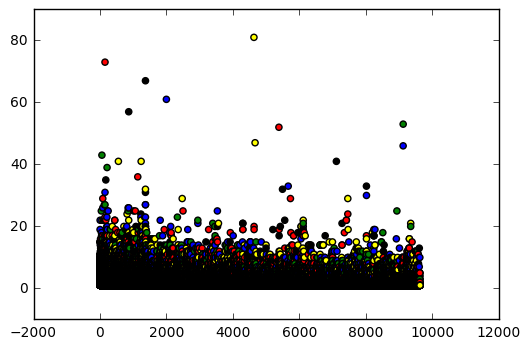

In [43]:
#import matplotlib.pyplot as plt
#Lets plot the Complete data, 
# Remember seeing is believing
colors = ['red', 'green', 'blue', 'yellow', 'black']
plt.scatter(data_array[:,0], data_array[:,3], c=colors )
#plt.show()

## Naive Bayes Algorithm

In [45]:

Xtrain, Xtest, ytrain, ytest = train_test_split(data_array[:,[0,1,2]],data_array[:,3],
                                                 random_state=10)
#Create a Gaussian Classifier
gb = GaussianNB()

# Train the model using the training sets 
gb.fit(Xtrain, ytrain)

#Predict Output 
ypredicted= gb.predict(Xtest)

#Calculating Mean Absolute Error 
mae = mean_absolute_error(ytest, ypredicted)
print "Mean Absolute Error:",mae


Mean Absolute Error: 0.047549306776


## Gradient Boosting Regressor

In [47]:
#Parameters
params = {'n_estimators':100, 'max _depth':  8, 
          'learning_rate': 0.3, 'loss': 'ls'}

# Creating Gradient Boosting Regressor
clf = ensemble.GradientBoostingRegressor(**params)

# Train the model
clf.fit(Xtrain, ytrain)

# Predict the results
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Mean Absolute Error:",mae

Mean Absolute Error: 0.00021349875878


## Random Forest Regressor

In [48]:
#Creating Random Forest Regressor
forest = RandomForestRegressor(n_estimators=100, max_depth=8)

#Training the model 
forest.fit(Xtrain, ytrain)

#Predicting outcome
yfit = forest.predict(Xtest)

#Evaluating the Error in predictions
mae =mean_absolute_error(ytest, yfit)

print "Mean Absolute Error:",mae

Mean Absolute Error: 0.0
